# ORIE 4580/5580/5581 Assignment 3

#### Students: Connor Drought (cpd53) and Jackie Lasseter (jl2638)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

All first drafts were created using chat gpt.

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [ ]:
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

In [ ]:
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


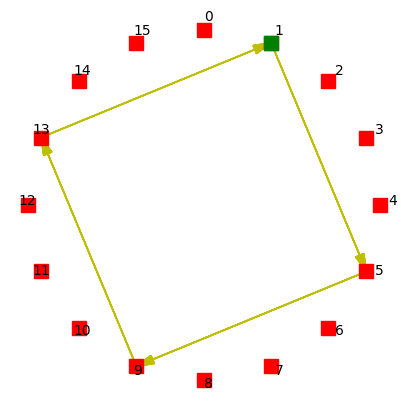

--


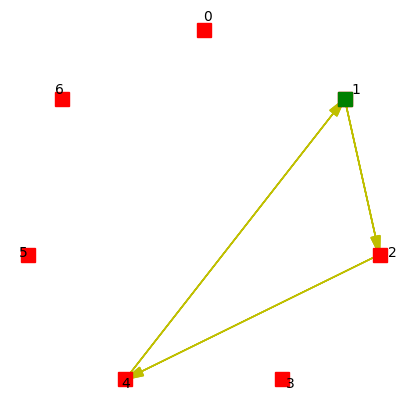

In [ ]:
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

print('--')

m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()




























___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

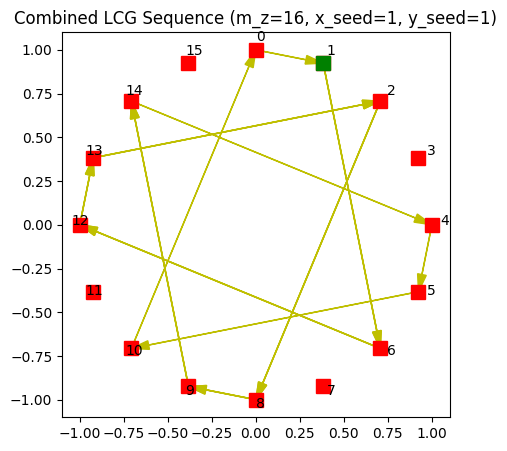

In [ ]:


# Combined LCG function
def combined_lcg(x, y, m):
    z = (x + y) % m
    return z

# Plot the combined LCG sequence on a clock face
def plot_combined_lcg_clock(x_seed, y_seed, a_x, c_x, m_x, a_y, c_y, m_y, m_z, n, fig):
    x_sequence = lcg(x_seed, a_x, c_x, m_x, n)
    y_sequence = lcg(y_seed, a_y, c_y, m_y, n)
    z_sequence = [combined_lcg(x_sequence[i], y_sequence[i], m_z) for i in range(n)]

    plot_clock_face(m_z, fig, annotate=True)
    plot_clock_path(m_z, z_sequence, fig)
    plt.title(f'Combined LCG Sequence (m_z={m_z}, x_seed={x_seed}, y_seed={y_seed})')
    plt.show()

# Combined LCG parameters
m_z = 16  # Modulus for the combined LCG
x_seed = y_seed = 1  # Seed for both x_n and y_n

# Plot the combined LCG sequence
fig_z = plt.figure(figsize=(5, 5))
plot_combined_lcg_clock(x_seed, y_seed, a_x, c_x, m_x, a_y, c_y, m_y, m_z, 20, fig_z)


___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

Period of $𝑥_𝑛$: Less than or equal to 16

Period of $𝑦_𝑛$: 6

Period of $𝑧_𝑛$: Less than or equal to 16


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


For y < 0, $F^{-1}(y)$ = undefined

For 0 $\leq$ y < 1/2, $F^{-1}(y) = y

For 1/2 $\leq$ y < 1, $F^{-1}(y)$ = 1/2

For y $\geq$ 1, $F^{-1}(y)$ = undefined

$$F^{-1}(y)=
	\begin{cases}
	y & \mbox{for $0 \leq y < 1/2$}\\
	1/2 & \mbox{for $1/2 \leq y < 1$}, \\
	undefined & \mbox{for other}
	 \end{cases}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

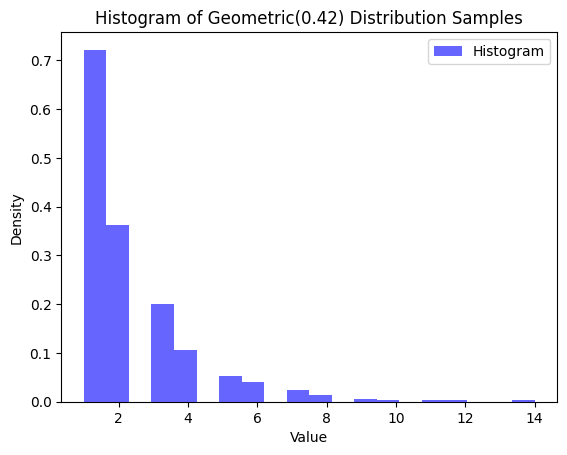

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_pmf(k, p):
    return p * (1 - p) ** (k - 1)

def geometric_quantile(p, q):
    # Inverse CDF (quantile function) for the geometric distribution
    return int(np.ceil(np.log(1 - q) / np.log(1 - p)))

def generate_geometric_samples(num_samples, p):
    # Generate samples using the inversion method
    U = np.random.rand(num_samples)  # Uniform random numbers between 0 and 1
    samples = [geometric_quantile(p, u) for u in U]
    return samples

# Parameters for the geometric distribution
p = 0.42
num_samples = 1000

# Generate geometric samples
samples = generate_geometric_samples(num_samples, p)

# Plot histogram
plt.hist(samples, bins=20, density=True, alpha=0.6, color='b', label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Geometric(0.42) Distribution Samples')
plt.legend()
plt.show()















___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

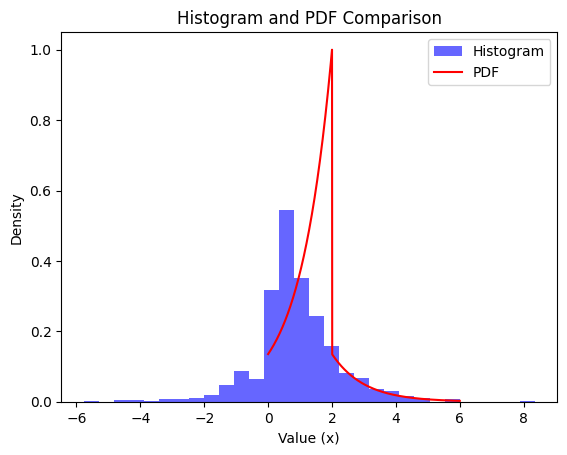

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x):
    if x >= 0 and x <= 2:
        return np.exp(x - 2)
    elif x > 2:
        return np.exp(-x)
    else:
        return 0

def cdf(x):
    if x < 0:
        return 0
    elif x >= 0 and x <= 2:
        return np.exp(x - 2)
    else:
        return 1 - np.exp(-x)

def quantile_function(q):
    # Inverse of the CDF (quantile function) using binary search
    # We want to find x such that cdf(x) = q
    # Since the CDF is a piecewise function, we handle the cases accordingly
    if q == 0:
        return 0  # The lower bound for the quantile function

    if q >= 0 and q < np.exp(-2):
        # Inverse of the CDF for the interval [0, 2]
        return 2 + np.log(q)
    elif q >= np.exp(-2) and q < 1:
        # Inverse of the CDF for the interval (2, infinity)
        return -np.log(1 - q)

def generate_samples(num_samples):
    # Generate samples using the inversion method
    U = np.random.rand(num_samples)  # Uniform random numbers between 0 and 1
    samples = [quantile_function(u) for u in U]
    return samples

# Parameters
num_samples = 1000

# Generate samples
samples = generate_samples(num_samples)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Histogram')
x_values = np.linspace(0, 6, 1000)
y_values = [pdf(x) for x in x_values]
plt.plot(x_values, y_values, color='r', label='PDF')
plt.xlabel('Value (x)')
plt.ylabel('Density')
plt.title('Histogram and PDF Comparison')
plt.legend()
plt.show()














___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Density function f(x)
    return (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

def proposal_distribution(n_samples):
    # Generate n_samples samples from the proposal distribution (uniform [0, 1])
    return np.random.uniform(0, 1, n_samples)

def acceptance_rejection_sampling(n_samples):
    samples = []
    max_f = 1.25  # Upper bound of the density function f(x)

    while len(samples) < n_samples:
        # Generate samples from the proposal distribution
        x = proposal_distribution(n_samples)
        u = np.random.uniform(0, max_f, n_samples)

        # Accept samples based on the acceptance criterion
        accepted_samples = x[u <= f(x)]
        samples.extend(accepted_samples)

    return np.array(samples[:n_samples])

# Number of samples to generate
n_samples = 1000

# Generate samples using the acceptance-rejection algorithm
samples = acceptance_rejection_sampling(n_samples)


___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In [ ]:
# Calculate the acceptance rate
area_under_f = np.trapz(f(x_values), x_values)  # Area under the density function
acceptance_rate = area_under_f  # Area under uniform distribution is 1

# Average number of samples needed to generate one sample of X
average_samples_per_x = 1 / acceptance_rate

print("Acceptance rate:", acceptance_rate)
print("Average number of samples needed per X:", average_samples_per_x)

Acceptance rate: 1.0000007932523363
Average number of samples needed per X: 0.999999206748293


### Ans.


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


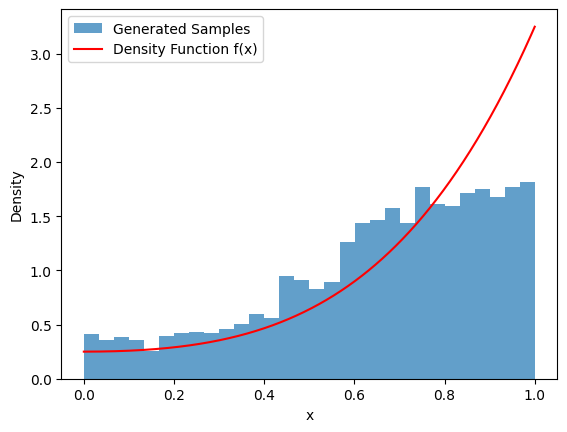

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Density function f(x)
    return (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

def proposal_distribution(n_samples):
    # Generate n_samples samples from the proposal distribution (uniform [0, 1])
    return np.random.uniform(0, 1, n_samples)

def acceptance_rejection_sampling(n_samples):
    samples = []
    max_f = 1.25  # Upper bound of the density function f(x)

    while len(samples) < n_samples:
        # Generate samples from the proposal distribution
        x = proposal_distribution(n_samples)
        u = np.random.uniform(0, max_f, n_samples)

        # Accept samples based on the acceptance criterion
        accepted_samples = x[u <= f(x)]
        samples.extend(accepted_samples)

    return np.array(samples[:n_samples])

# Number of samples to generate
n_samples = 2500

# Generate samples using the acceptance-rejection algorithm
samples = acceptance_rejection_sampling(n_samples)

# Plot the histogram of generated samples
plt.hist(samples, bins=30, density=True, alpha=0.7, label='Generated Samples')
x_values = np.linspace(0, 1, 1000)
plt.plot(x_values, f(x_values), 'r-', label='Density Function f(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()














___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

Average number of iterations: 1367.47


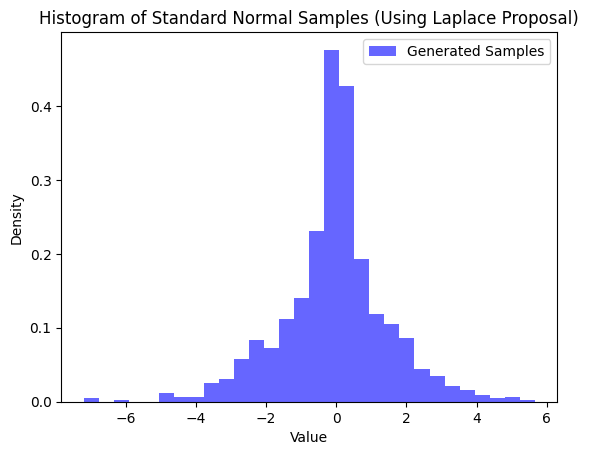

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Define the probability density functions
def functiong(x):
    return np.exp(-np.abs(x)) / 2

def functionf(x):
    return (np.exp(-x**2 / 2)) / (np.sqrt(2 * np.pi))

n = np.zeros(100)
for k in range(100):
    Z = np.array([])
    while len(Z) < 1000:
        n[k] += 1
        # Generate a sample from the Laplace proposal distribution
        Ul = np.random.uniform(0, 1)
        z1 = scipy.stats.laplace.ppf(Ul)

        # Generate a sample from the uniform distribution
        U2 = np.random.uniform(0, 1)

        # Calculate the acceptance probability
        acceptance_prob = (np.sqrt(2 * np.exp(1)) / np.pi) * functiong(z1) / functionf(z1)

        # Accept or reject the sample
        if U2 <= acceptance_prob:
            Z = np.append(Z, z1)

# Calculate the average number of iterations needed
avg_iterations = np.average(n)
print("Average number of iterations:", avg_iterations)

# Plot the histogram of the generated samples
plt.hist(Z, bins=30, density=True, alpha=0.6, color='b', label='Generated Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Standard Normal Samples (Using Laplace Proposal)')
plt.legend()
plt.show()














___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Define the probability density functions
def functiong(x):
    return np.exp(-np.abs(x)) / 2

def functionf(x):
    return (np.exp(-x**2 / 2)) / (np.sqrt(2 * np.pi))

# Define the constant k
k = 2 / np.sqrt(2 * np.pi)

# Initialize variables
n = 0  # Number of iterations
n_values = []  # Store the number of iterations for each sample

# Generate samples using acceptance-rejection
def generate_sample():
    global n
    while True:
        n += 1
        # Generate a sample from the Laplace proposal distribution
        Ul = np.random.uniform(0, 1)
        z1 = scipy.stats.laplace.ppf(Ul)

        # Generate a sample from the uniform distribution
        U2 = np.random.uniform(0, 1)

        # Calculate the acceptance probability
        acceptance_prob = k * functiong(z1) / functionf(z1)

        # Accept or reject the sample
        if U2 <= acceptance_prob:
            return z1

# Number of samples to generate
num_samples = 1000
samples = [generate_sample() for _ in range(num_samples)]

# Calculate the expected number of iterations needed per sample
expected_iterations_per_sample = n / num_samples
print("Expected number of iterations per sample:", expected_iterations_per_sample)

Expected number of iterations per sample: 1.267


### Ans.

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

In [ ]:
import numpy as np
import scipy.stats

# Define the probability density functions
def functiong(x):
    return np.exp(-np.abs(x)) / 2

def functionf(x):
    return (np.exp(-x**2 / 2)) / (np.sqrt(2 * np.pi))

# Define the constant k
k = 2 / np.sqrt(2 * np.pi)

# Initialize variables
num_samples = 1000
n_values = []

# Generate samples using acceptance-rejection and record the number of iterations
for _ in range(num_samples):
    n = 0  # Number of iterations
    while True:
        n += 1
        # Generate a sample from the Laplace proposal distribution
        Ul = np.random.uniform(0, 1)
        z1 = scipy.stats.laplace.ppf(Ul)

        # Generate a sample from the uniform distribution
        U2 = np.random.uniform(0, 1)

        # Calculate the acceptance probability
        acceptance_prob = k * functiong(z1) / functionf(z1)

        # Accept or reject the sample
        if U2 <= acceptance_prob:
            n_values.append(n)
            break

# Calculate the average number of iterations needed
average_iterations = np.mean(n_values)

# Calculate the 95% confidence interval
confidence_interval = scipy.stats.norm.interval(0.95, loc=average_iterations, scale=np.std(n_values) / np.sqrt(len(n_values)))

# Print the results
print("Average number of iterations:", average_iterations)
print("95% Confidence Interval for Iterations:", confidence_interval)


Average number of iterations: 1.296
95% Confidence Interval for Iterations: (1.255339178401247, 1.336660821598753)


___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

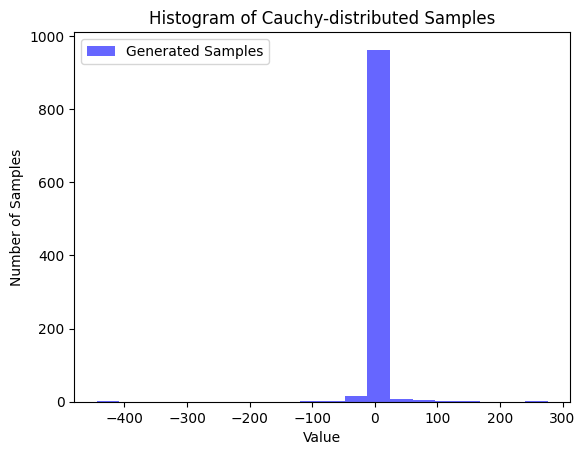

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate Cauchy-distributed samples
U = np.random.uniform(0, 1, num_samples)
Z = np.tan(np.pi * (U - 0.5))

# Plot the histogram of the generated samples with counts (number of samples)
plt.hist(Z, bins=20, alpha=0.6, color='b', label='Generated Samples')
plt.xlabel('Value')
plt.ylabel('Number of Samples')
plt.title('Histogram of Cauchy-distributed Samples')
plt.legend()
plt.show()


___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

<ipython-input-29-1ed6ead02a14>:31: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_prob = k * functiong(z1) / functionf(z1)


Expected number of iterations per sample: 1.0


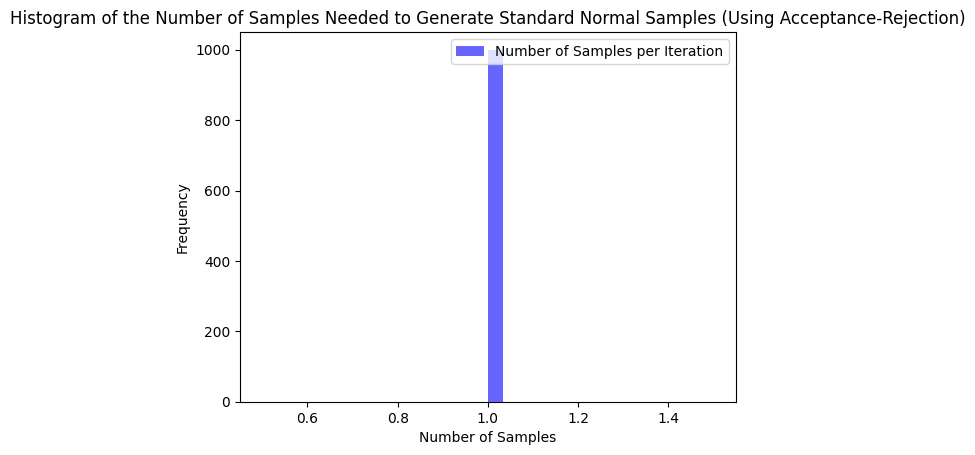

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density functions
def functiong(x):
    return 1 / (np.pi * (1 + x**2))

def functionf(x):
    return (np.exp(-x**2 / 2)) / (np.sqrt(2 * np.pi))

# Define the constant k
k = np.pi * np.sqrt(2 * np.pi)

# Initialize variables
num_samples = 1000
n_values = []  # Store the number of iterations for each sample

# Generate samples using acceptance-rejection and record the number of iterations
for _ in range(num_samples):
    n = 0  # Number of iterations
    while True:
        n += 1
        # Generate a sample from the Laplace proposal distribution
        U = np.random.uniform(0, 1)
        z1 = np.tan(np.pi * (U - 0.5))

        # Generate a sample from the uniform distribution
        U2 = np.random.uniform(0, 1)

        # Calculate the acceptance probability
        acceptance_prob = k * functiong(z1) / functionf(z1)

        # Accept or reject the sample
        if U2 <= acceptance_prob:
            n_values.append(n)
            break

# Calculate the average number of iterations needed per sample
average_iterations = np.mean(n_values)

# Print the results
print("Expected number of iterations per sample:", average_iterations)

# Plot the histogram of the generated samples
plt.hist(n_values, bins=30, alpha=0.6, color='b', label='Number of Samples per Iteration')
plt.xlabel('Number of Samples')
plt.ylabel('Frequency')
plt.title('Histogram of the Number of Samples Needed to Generate Standard Normal Samples (Using Acceptance-Rejection)')
plt.legend()
plt.show()


Average number of iterations per sample: 1.0
95% Confidence Interval for Iterations: [1. 1.]


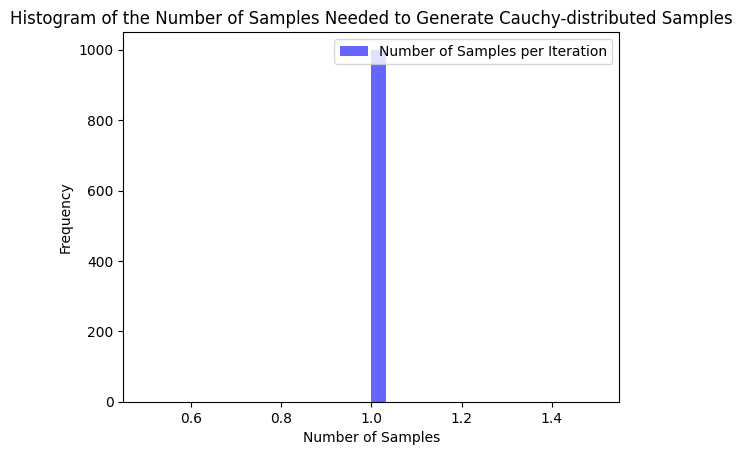

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples to generate
num_samples = 1000

# Initialize variables
n_values = []  # Store the number of iterations for each sample

# Generate Cauchy-distributed samples and record the number of iterations
for _ in range(num_samples):
    n = 0  # Number of iterations
    while True:
        n += 1
        # Generate a sample from the uniform distribution
        U = np.random.uniform(0, 1)

        # Transform U into a Cauchy-distributed sample using the inverse CDF
        Z = np.tan(np.pi * (U - 0.5))

        # Check if the sample is valid (finite)
        if np.isfinite(Z):
            n_values.append(n)
            break

# Calculate the average number of iterations needed
average_iterations = np.mean(n_values)

# Calculate the 95% confidence interval for the number of iterations
confidence_interval = np.percentile(n_values, [2.5, 97.5])

# Print the results
print("Average number of iterations per sample:", average_iterations)
print("95% Confidence Interval for Iterations:", confidence_interval)

# Plot the histogram of the generated Cauchy-distributed samples
plt.hist(n_values, bins=30, alpha=0.6, color='b', label='Number of Samples per Iteration')
plt.xlabel('Number of Samples')
plt.ylabel('Frequency')
plt.title('Histogram of the Number of Samples Needed to Generate Cauchy-distributed Samples')
plt.legend()
plt.show()


### Ans.